In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
plt.rcParams["figure.figsize"] = (3.5,2.5)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

In [4]:
def func(x, mu,sigma):
    return (1.0/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*np.power((x-mu)/sigma,2))

def func2(x, x0, gamma):
    return (1.0/np.pi)*gamma/(np.power(x-x0,2)+gamma*gamma)

In [5]:
energy_model_concat = np.load("energy_model.npy")
energy_dft_concat = np.load("energy_dft.npy")
force_model_concat = np.load("force_model.npy")
force_dft_concat = np.load("force_dft.npy")

In [8]:
print(np.sqrt(np.mean(np.power(energy_model_concat-energy_dft_concat,2))))

0.41208529878132505


In [9]:
print(np.sqrt(np.mean(np.power(force_model_concat-force_dft_concat,2))))

101.58310480834336


Energy fit parameters:  [-0.001126    0.37155493] [0.00320638 0.002618  ]
Forces fit parameters:  [0.00012898 0.04613018] [0.00053856 0.00053888]


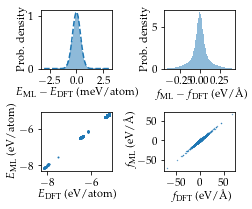

<Figure size 252x216 with 0 Axes>

In [7]:
plt.rcParams["figure.figsize"] = (3.5,3)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 11}
plt.rc('font', **font)

f, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].set_xlabel(r"$E_\mathrm{ML}-E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[0,0].set_ylabel("Prob. density",labelpad=1.25)
ax[0,0].hist(energy_model_concat-energy_dft_concat,density=True, bins=50, range=(-3,3),alpha=0.5)
hist, bin_edges = np.histogram(energy_model_concat-energy_dft_concat, bins=50, range=(-3,3),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-3,3,100)
#ax[0,0].set_xlim([-3,3])
ax[0,0].plot(x,func(x,*popt),'--',color=colors[0])
print("Energy fit parameters: ", popt,np.sqrt(np.diag(pcov)))

ax[0,1].set_xlabel(r"$f_\mathrm{ML}-f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[0,1].set_ylabel("Prob. density",labelpad=1.25)
ax[0,1].hist((force_model_concat-force_dft_concat)/1000,density=True, bins=100, range=(-0.400,0.400),alpha=0.5)
hist, bin_edges = np.histogram((force_model_concat-force_dft_concat)/1000, bins=100, range=(-0.400,0.400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
#ax[0,1].set_xlim([-0.4,0.4])
#ax[0,1].set_xticks([-0.3,0,0.3])
#x=np.linspace(-0.400,0.400,100)
#ax[0,1].plot(x,func2(x,*popt),'--',color=colors[0])
print("Forces fit parameters: ", popt,np.sqrt(np.diag(pcov)))

#mean=1000*np.mean(energy_dft_concat)+10
#meanWater=np.copy(mean)
ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (eV/atom)",labelpad=1.25)
ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (eV/atom)",labelpad=1.25)
ax[1,0].scatter(energy_dft_concat/1000,energy_model_concat/1000,s=1)
#limsup=50
#liminf=-50
#ax[1,0].set_xlim([liminf,limsup])
#ax[1,0].set_ylim([liminf,limsup])
#ax[1,0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1,1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1,1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1,1].scatter(force_dft_concat/1000,force_model_concat/1000,s=0.1)
#limsup=8
#liminf=-8
#ax[1,1].set_xlim([liminf,limsup])
#ax[1,1].set_ylim([liminf,limsup])
#ax[1,1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

#f.savefig("plot_water.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()


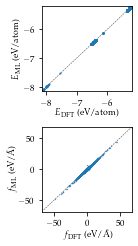

<Figure size 144x252 with 0 Axes>

In [9]:
plt.rcParams["figure.figsize"] = (2,3.5)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

f, ax = plt.subplots(2)
plt.tight_layout()


ax[0].set_xlabel(r"$E_\mathrm{DFT}$ (eV/atom)",labelpad=1.25)
ax[0].set_ylabel(r"$E_\mathrm{ML}$ (eV/atom)",labelpad=1.25)
ax[0].scatter(energy_dft_concat/1000,energy_model_concat/1000,s=1)
limsup=np.amax(energy_dft_concat)/1000
liminf=np.amin(energy_dft_concat)/1000
ax[0].set_xlim([liminf,limsup])
ax[0].set_ylim([liminf,limsup])
ax[0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1].scatter(force_dft_concat/1000,force_model_concat/1000,s=0.1)
limsup=np.amax(force_dft_concat)/1000
liminf=np.amin(force_dft_concat)/1000
ax[1].set_xlim([liminf,limsup])
ax[1].set_ylim([liminf,limsup])
ax[1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

#f.savefig("plot_water.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()


In [41]:

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    #subax = fig.add_axes([x,y,width,height],facecolor=facecolor)  # matplotlib 2.0+
    subax = fig.add_axes([x,y,width,height]) #,axisbg=axisbg)
    #x_labelsize = subax.get_xticklabels()[0].get_size()
    #y_labelsize = subax.get_yticklabels()[0].get_size()
    #x_labelsize *= rect[2]**0.5
    #y_labelsize *= rect[3]**0.5
    #subax.xaxis.set_tick_params(labelsize=x_labelsize)
    #subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

<ipython-input-73-b040ef43db31>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


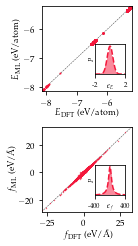

In [73]:
plt.rcParams["figure.figsize"] = (2,3.5)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

f, ax = plt.subplots(2)
plt.tight_layout()
mycolor="#F4173B"

ax[0].set_xlabel(r"$E_\mathrm{DFT}$ (eV/atom)",labelpad=1.25)
ax[0].set_ylabel(r"$E_\mathrm{ML}$ (eV/atom)",labelpad=1.25)
ax[0].scatter(energy_dft_concat/1000,energy_model_concat/1000,s=1,color=mycolor)
limsup=np.amax(energy_dft_concat)/1000
liminf=np.amin(energy_dft_concat)/1000
ax[0].set_xlim([liminf,limsup])
ax[0].set_ylim([liminf,limsup])
ax[0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


rect = [0.69,0.3,0.325,0.325]
ax1 = add_subplot_axes(ax[0],rect)
ax1.set_yticks([])
ax1.set_xticks([-2,2])
ax1.set_xticklabels(["-2","2"],fontsize=7)
#ax1.tick_params(axis='x', which='major', pad=-0.1)
ax1.set_xlim([-2,2])
ax1.set_xlabel(r"$\epsilon_E$",fontsize=7,labelpad=-6)
ax1.set_ylabel(r"$P$",fontsize=7,labelpad=-1)
ax1.hist(energy_model_concat-energy_dft_concat,density=True, bins=100, range=(-3,3),alpha=0.5,color=mycolor)
hist, bin_edges = np.histogram(energy_model_concat-energy_dft_concat, bins=100, range=(-3,3),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-3,3,100)
#ax[0,0].set_xlim([-3,3])
ax1.plot(x,func(x,*popt),'--',color=mycolor)



ax[1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1].scatter(force_dft_concat[::10]/1000,force_model_concat[::10]/1000,s=0.1,color=mycolor)
limsup=np.amax(force_dft_concat[::10])/1000
liminf=np.amin(force_dft_concat[::10])/1000
ax[1].set_xlim([liminf,limsup])
ax[1].set_ylim([liminf,limsup])
ax[1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

rect = [0.69,0.3,0.325,0.325]
ax2 = add_subplot_axes(ax[1],rect)
ax2.set_yticks([])
ax2.set_xticks([-400,400])
ax2.set_xticklabels(["-400","400"],fontsize=7)
ax2.set_xlim([-400,400])
ax2.set_xlabel(r"$\epsilon_f$",fontsize=7,labelpad=-6)
ax2.set_ylabel(r"$P$",fontsize=7,labelpad=-1)
ax2.hist(force_model_concat[::10]-force_dft_concat[::10],density=True, bins=100, range=(-400,400),alpha=0.5,color=mycolor)
hist, bin_edges = np.histogram(force_model_concat[::10]-force_dft_concat[::10], bins=100, range=(-400,400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
x=np.linspace(-400,400,100)
ax2.plot(x,func2(x,*popt),'--',color=mycolor)

f.tight_layout()

f.savefig("plot_errors.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_errors.pdf",bbox_inches='tight')

plt.show()


<ipython-input-71-7646d74f6ac4>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


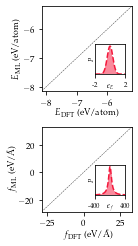

In [71]:
plt.rcParams["figure.figsize"] = (2,3.5)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

f, ax = plt.subplots(2)
plt.tight_layout()
mycolor="#F4173B"

ax[0].set_xlabel(r"$E_\mathrm{DFT}$ (eV/atom)",labelpad=1.25)
ax[0].set_ylabel(r"$E_\mathrm{ML}$ (eV/atom)",labelpad=1.25)
#ax[0].scatter(energy_dft_concat/1000,energy_model_concat/1000,s=1,color=mycolor)
limsup=np.amax(energy_dft_concat)/1000
liminf=np.amin(energy_dft_concat)/1000
ax[0].set_xlim([liminf,limsup])
ax[0].set_ylim([liminf,limsup])
ax[0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


rect = [0.69,0.3,0.325,0.325]
ax1 = add_subplot_axes(ax[0],rect)
ax1.set_yticks([])
ax1.set_xticks([-2,2])
ax1.set_xticklabels(["-2","2"],fontsize=7)
#ax1.tick_params(axis='x', which='major', pad=-0.1)
ax1.set_xlim([-2,2])
ax1.set_xlabel(r"$\epsilon_E$",fontsize=7,labelpad=-6)
ax1.set_ylabel(r"$P$",fontsize=7,labelpad=-1)
ax1.hist(energy_model_concat-energy_dft_concat,density=True, bins=100, range=(-3,3),alpha=0.5,color=mycolor)
hist, bin_edges = np.histogram(energy_model_concat-energy_dft_concat, bins=100, range=(-3,3),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-3,3,100)
#ax[0,0].set_xlim([-3,3])
ax1.plot(x,func(x,*popt),'--',color=mycolor)



ax[1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
#ax[1].scatter(force_dft_concat/1000,force_model_concat/1000,s=0.1,color=mycolor)
limsup=np.amax(force_dft_concat[::10])/1000
liminf=np.amin(force_dft_concat[::10])/1000
ax[1].set_xlim([liminf,limsup])
ax[1].set_ylim([liminf,limsup])
ax[1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

rect = [0.69,0.3,0.325,0.325]
ax2 = add_subplot_axes(ax[1],rect)
ax2.set_yticks([])
ax2.set_xticks([-400,400])
ax2.set_xticklabels(["-400","400"],fontsize=7)
ax2.set_xlim([-400,400])
ax2.set_xlabel(r"$\epsilon_f$",fontsize=7,labelpad=-6)
ax2.set_ylabel(r"$P$",fontsize=7,labelpad=-1)
ax2.hist(force_model_concat[::10]-force_dft_concat[::10],density=True, bins=100, range=(-400,400),alpha=0.5,color=mycolor)
hist, bin_edges = np.histogram(force_model_concat[::10]-force_dft_concat[::10], bins=100, range=(-400,400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
x=np.linspace(-400,400,100)
ax2.plot(x,func2(x,*popt),'--',color=mycolor)

f.tight_layout()

#f.savefig("plot_errors.png",dpi=300,bbox_inches='tight')
f.savefig("plot_errors.pdf",bbox_inches='tight')

plt.show()


In [13]:
folders=np.array(["data-iteration-0/feldspar/bulk",
                "data-iteration-0/feldspar/001-2",
                "data-iteration-0/feldspar/010-2",
                "data-iteration-0/feldspar/100-3/set2"
                 ])

initialized=False

for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    shift=np.mean(energy_model)
    energy_model -= shift
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    energy_dft -= shift
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    if initialized:
        energy_model_concat = np.concatenate((energy_model_concat,energy_model/number_of_molecules),axis=0)
        energy_dft_concat = np.concatenate((energy_dft_concat,energy_dft/number_of_molecules),axis=0)
        force_model_concat = np.concatenate((force_model_concat,force_model),axis=0)
        force_dft_concat = np.concatenate((force_dft_concat,force_dft),axis=0)
    else:
        energy_model_concat = energy_model/number_of_molecules
        energy_dft_concat = energy_dft/number_of_molecules
        force_model_concat = np.copy(force_model)
        force_dft_concat = np.copy(force_dft)
        initialized=True
    filename = "energy-" + folder.replace("/","-") + ".png"
    #plt.close()
    rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model-energy_dft)/number_of_molecules,2)))
    rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model-force_dft),2)))
    print("system:",folder,"N frames:",frames,"N atoms:",number_of_molecules,"RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model_concat-energy_dft_concat),2)))
rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model_concat-force_dft_concat),2)))
print("All: RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

system: data-iteration-0/feldspar/bulk N frames: 302 N atoms: 52 RMSE energy: 1.0515591315423682 RMSE forces: 93.73851211411318
system: data-iteration-0/feldspar/001-2 N frames: 28 N atoms: 128 RMSE energy: 2.2513963575638614 RMSE forces: 136.39035671317518
system: data-iteration-0/feldspar/010-2 N frames: 20 N atoms: 64 RMSE energy: 1.9391406840652154 RMSE forces: 167.07409481728158
system: data-iteration-0/feldspar/100-3/set2 N frames: 300 N atoms: 70 RMSE energy: 0.8800318301871938 RMSE forces: 116.77508000762785
All: RMSE energy: 1.097838904740986 RMSE forces: 112.5705205846092


Energy fit parameters:  [0.1806751  0.81588149] [0.03110364 0.02539602]
Forces fit parameters:  [-0.00036775  0.06006474] [0.00109051 0.00109188]


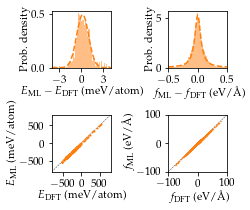

<Figure size 252x216 with 0 Axes>

In [16]:
plt.rcParams["figure.figsize"] = (3.5,3)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 11}
plt.rc('font', **font)

f, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].set_xlabel(r"$E_\mathrm{ML}-E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[0,0].set_ylabel("Prob. density",labelpad=1.25)
ax[0,0].hist(1000*(energy_model_concat-energy_dft_concat),density=True, bins=50, range=(-4,4),alpha=0.5,color=colors[1])
hist, bin_edges = np.histogram(1000*(energy_model_concat-energy_dft_concat), bins=50, range=(-4,4),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-4,4,100)
ax[0,0].set_xlim([-4,4])
ax[0,0].set_xticks([-3,0,3])
ax[0,0].plot(x,func(x,*popt),'--',color=colors[1])
print("Energy fit parameters: ", popt,np.sqrt(np.diag(pcov)))

ax[0,1].set_xlabel(r"$f_\mathrm{ML}-f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[0,1].set_ylabel("Prob. density",labelpad=1.25)
ax[0,1].hist(force_model_concat-force_dft_concat,density=True, bins=100, range=(-0.500,0.500),alpha=0.5,color=colors[1])
hist, bin_edges = np.histogram(force_model_concat-force_dft_concat, bins=100, range=(-0.400,0.400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
ax[0,1].set_xlim([-0.5,0.5])
x=np.linspace(-0.500,0.500,100)
ax[0,1].plot(x,func2(x,*popt),'--',color=colors[1])
print("Forces fit parameters: ", popt,np.sqrt(np.diag(pcov)))

shift=-300
ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (meV/atom)",labelpad=1.25)
ax[1,0].scatter(1000*energy_dft_concat+shift,1000*energy_model_concat+shift,s=1,color=colors[1])
limsup=800
liminf=-800
ax[1,0].set_xlim([liminf,limsup])
ax[1,0].set_ylim([liminf,limsup])
ax[1,0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1,1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1,1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1,1].scatter(force_dft_concat,force_model_concat,s=0.1,color=colors[1])
limsup=100
liminf=-100
ax[1,1].set_xlim([liminf,limsup])
ax[1,1].set_ylim([liminf,limsup])
ax[1,1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

f.savefig("plot_felds.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()

In [17]:
folders=np.array(["data-iteration-0/feldspar/bulk",
                "data-iteration-0/feldspar/001-2",
                "data-iteration-0/feldspar/010-2",
                "data-iteration-0/feldspar/100-3/set2",
                "data-iteration-0/feldspar/100-water-3/set1",
                "data-iteration-0/water/3200bar-235K/HDL-LDL",
                "data-iteration-0/water/multithermal",
                "data-iteration-0/water/1bar-260K",
                "data-iteration-0/water/1bar-270K",
                "data-iteration-0/water/1bar-280K",
                "data-iteration-0/water/1bar-300K",
                "data-iteration-0/water/crystallization/iceIh/0",
                "data-iteration-0/water/crystallization/iceIh/1",
                "data-iteration-0/water/crystallization/iceIh/2",
                "data-iteration-0/water/crystallization/iceIc/0",
                "data-iteration-0/water/crystallization/iceIc/1",
                "data-iteration-0/water/crystallization/iceIc/2",
                "data-iteration-6/feldspar/100-water-3-250K",
                "data-iteration-6/feldspar/100-water-3-300K",
                "data-iteration-6/feldspar/100-water-3-350K",
                "data-iteration-7/feldspar/100-water-3-250K",
                "data-iteration-7/feldspar/100-water-3-275K",
                "data-iteration-7/feldspar/100-water-3-300K",
                "data-iteration-7/feldspar/100-water-3-325K",
                "data-iteration-7/feldspar/100-water-3-350K",
                "data-iteration-8/feldspar/100-water-3-250K",
                "data-iteration-8/feldspar/100-water-3-300K",
                "data-iteration-8/feldspar/100-water-3-350K",
                "data-iteration-9/feldspar/100-water-3",
                "data-iteration-10/feldspar/100-water-3-large",
                "data-iteration-11/feldspar/010-water-2",
                "data-iteration-11/water/iteration-1",
                "data-iteration-11/water/iteration-2",
                "data-iteration-12/water/iteration-3",
                "data-iteration-12/water/iteration-4",
                "data-iteration-12/water/iteration-12",
                "data-iteration-13/feldspar/crystallization/001",
                "data-iteration-13/feldspar/crystallization/010",
                "data-iteration-15/feldspar/crystallization/001",
                "data-iteration-15/feldspar/crystallization/010",
                "data-iteration-17/feldspar/crystallization/001",
                "data-iteration-17/feldspar/crystallization/010",
                "data-iteration-18/feldspar/crystallization/001",
                "data-iteration-18/feldspar/crystallization/010",
                "data-iteration-19/feldspar/crystallization/001",
                "data-iteration-19/feldspar/crystallization/010",
                "data-iteration-19/feldspar/crystallization/100",
                "data-iteration-20/feldspar/crystallization/100/1",
                "data-iteration-20/feldspar/crystallization/100/2",
                "data-iteration-21/feldspar/crystallization/100/1",
                "data-iteration-21/feldspar/crystallization/100/2",
                "data-iteration-22/feldspar/crystallization/100/1",
                "data-iteration-22/feldspar/crystallization/100/2",
                "data-iteration-23/feldspar/crystallization/100/1",
                "data-iteration-23/feldspar/crystallization/100/2",
                "data-iteration-24/feldspar/crystallization/100/1",
                "data-iteration-24/feldspar/crystallization/100/2",
                "data-iteration-25/feldspar/crystallization/100",
                "data-iteration-25/feldspar/crystallization/010",
                "data-iteration-25/feldspar/crystallization/001",
                "data-iteration-26/feldspar/crystallization/100",
                "data-iteration-26/feldspar/crystallization/010",
                "data-iteration-26/feldspar/crystallization/001"])

initialized=False

for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    shift=np.mean(energy_model)
    energy_model -= shift
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    energy_dft -= shift
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    if initialized:
        energy_model_concat = np.concatenate((energy_model_concat,energy_model/number_of_molecules),axis=0)
        energy_dft_concat = np.concatenate((energy_dft_concat,energy_dft/number_of_molecules),axis=0)
        force_model_concat = np.concatenate((force_model_concat,force_model),axis=0)
        force_dft_concat = np.concatenate((force_dft_concat,force_dft),axis=0)
    else:
        energy_model_concat = energy_model/number_of_molecules
        energy_dft_concat = energy_dft/number_of_molecules
        force_model_concat = np.copy(force_model)
        force_dft_concat = np.copy(force_dft)
        initialized=True
    filename = "energy-" + folder.replace("/","-") + ".png"
    #plt.close()
    rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model-energy_dft)/number_of_molecules,2)))
    rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model-force_dft),2)))
    print("system:",folder,"N frames:",frames,"N atoms:",number_of_molecules,"Mean and dev:",popt,"RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model_concat-energy_dft_concat),2)))
rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model_concat-force_dft_concat),2)))
print("All: RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)



system: data-iteration-0/feldspar/bulk N frames: 302 N atoms: 52 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 1.0515591315423682 RMSE forces: 93.73851211411318
system: data-iteration-0/feldspar/001-2 N frames: 28 N atoms: 128 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 2.2513963575638614 RMSE forces: 136.39035671317518
system: data-iteration-0/feldspar/010-2 N frames: 20 N atoms: 64 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 1.9391406840652154 RMSE forces: 167.07409481728158
system: data-iteration-0/feldspar/100-3/set2 N frames: 300 N atoms: 70 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 0.8800318301871938 RMSE forces: 116.77508000762785
system: data-iteration-0/feldspar/100-water-3/set1 N frames: 32 N atoms: 130 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 4.068880441929826 RMSE forces: 138.61616153227092
system: data-iteration-0/water/3200bar-235K/HDL-LDL N frames: 201 N atoms: 576 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 0.4537

system: data-iteration-19/feldspar/crystallization/100 N frames: 402 N atoms: 544 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 0.42477807210599755 RMSE forces: 101.45520362554183
system: data-iteration-20/feldspar/crystallization/100/1 N frames: 400 N atoms: 544 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 0.48003643369334587 RMSE forces: 101.26584162367877
system: data-iteration-20/feldspar/crystallization/100/2 N frames: 200 N atoms: 544 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 0.45972844701417787 RMSE forces: 103.52396483185852
system: data-iteration-21/feldspar/crystallization/100/1 N frames: 200 N atoms: 544 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 0.41971813253125817 RMSE forces: 99.97888689438936
system: data-iteration-21/feldspar/crystallization/100/2 N frames: 222 N atoms: 544 Mean and dev: [-0.00036775  0.06006474] RMSE energy: 0.3842071246076442 RMSE forces: 99.7455641826721
system: data-iteration-22/feldspar/crystallization/100/1 N fr

Energy fit parameters:  [0.05922003 0.56041318] [0.0134176  0.01095543]
Forces fit parameters:  [-0.00049015  0.05623454] [0.00094443 0.00094542]


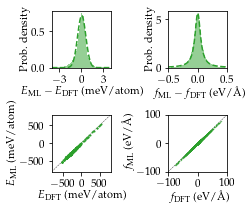

<Figure size 252x216 with 0 Axes>

In [19]:
plt.rcParams["figure.figsize"] = (3.5,3)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 11}
plt.rc('font', **font)

f, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].set_xlabel(r"$E_\mathrm{ML}-E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[0,0].set_ylabel("Prob. density",labelpad=1.25)
ax[0,0].hist(1000*(energy_model_concat-energy_dft_concat),density=True, bins=50, range=(-4,4),alpha=0.5,color=colors[2])
hist, bin_edges = np.histogram(1000*(energy_model_concat-energy_dft_concat), bins=50, range=(-4,4),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-4,4,100)
ax[0,0].set_xlim([-4,4])
ax[0,0].set_xticks([-3,0,3])
ax[0,0].plot(x,func(x,*popt),'--',color=colors[2])
print("Energy fit parameters: ", popt,np.sqrt(np.diag(pcov)))

ax[0,1].set_xlabel(r"$f_\mathrm{ML}-f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[0,1].set_ylabel("Prob. density",labelpad=1.25)
ax[0,1].hist(force_model_concat-force_dft_concat,density=True, bins=100, range=(-0.500,0.500),alpha=0.5,color=colors[2])
hist, bin_edges = np.histogram(force_model_concat-force_dft_concat, bins=100, range=(-0.400,0.400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
ax[0,1].set_xlim([-0.5,0.5])
x=np.linspace(-0.500,0.500,100)
ax[0,1].plot(x,func2(x,*popt),'--',color=colors[2])
print("Forces fit parameters: ", popt,np.sqrt(np.diag(pcov)))

#mean=((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat))
#print(1000*np.mean(energy_dft_concat))
#print(1000*((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat)))
shift=-300
ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (meV/atom)",labelpad=1.25)
ax[1,0].scatter(1000*energy_dft_concat+shift,1000*energy_model_concat+shift,s=1,color=colors[2])
limsup=800
liminf=-800
ax[1,0].set_xlim([liminf,limsup])
ax[1,0].set_ylim([liminf,limsup])
ax[1,0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1,1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1,1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1,1].scatter(force_dft_concat,force_model_concat,s=0.1,color=colors[2])
limsup=100
liminf=-100
ax[1,1].set_xlim([liminf,limsup])
ax[1,1].set_ylim([liminf,limsup])
ax[1,1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

f.savefig("plot_all.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()

-264900.76031744253
-327083.3959572136


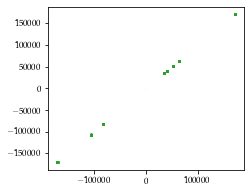

In [84]:
mean=1000*((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat))
print(1000*np.mean(energy_dft_concat))
print(1000*((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat)))
#ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
#ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (meV/atom)",labelpad=1.25)
plt.scatter(1000*energy_dft_concat-mean,1000*energy_model_concat-mean,s=1,color=colors[2])
#limsup=100
#liminf=-100
#ax[1,0].set_xlim([liminf,limsup])
#ax[1,0].set_ylim([liminf,limsup])
plt.plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)
plt.show()

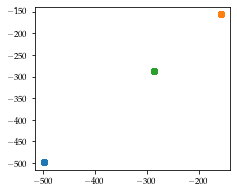

In [116]:
folders=np.array(["data-iteration-0/feldspar/bulk",
                  "data-iteration-0/water/crystallization/iceIh/0",
                  "data-iteration-26/feldspar/crystallization/100"])

initialized=False
counter=0
for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    plt.scatter(energy_dft/number_of_molecules,energy_model/number_of_molecules,color=colors[counter])
    counter += 1
plt.show()


In [10]:
path="/scratch/gpfs/ppiaggi/Simulations/HeterogeneousNucleation/TrainModel/Feldspar/iteration-28/"

folders=np.array([#"data-iteration-0/water/3200bar-235K/LDL",
                #"data-iteration-0/water/1bar-265K",
                #"data-iteration-0/water/1bar-275K",
                #"data-iteration-0/water/1bar-290K",
                #"data-iteration-0/water/1bar-310K",
                #"data-iteration-0/feldspar/100-3/set1",
                #"data-iteration-0/water/crystallization/iceIh/3",
                #"data-iteration-0/water/crystallization/iceIc/3",
                "data-iteration-27/feldspar/crystallization/001",
                "data-iteration-27/feldspar/crystallization/010"
                 ])

initialized=False

for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    if initialized:
        energy_model_concat = np.concatenate((energy_model_concat,energy_model/number_of_molecules),axis=0)
        energy_dft_concat = np.concatenate((energy_dft_concat,energy_dft/number_of_molecules),axis=0)
        force_model_concat = np.concatenate((force_model_concat,force_model),axis=0)
        force_dft_concat = np.concatenate((force_dft_concat,force_dft),axis=0)
    else:
        energy_model_concat = energy_model/number_of_molecules
        energy_dft_concat = energy_dft/number_of_molecules
        force_model_concat = np.copy(force_model)
        force_dft_concat = np.copy(force_dft)
        initialized=True
    filename = "energy-" + folder.replace("/","-") + ".png"
    #plt.close()
    rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model-energy_dft)/number_of_molecules,2)))
    rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model-force_dft),2)))
    print("system:",folder,"N frames:",frames,"N atoms:",number_of_molecules,"RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model_concat-energy_dft_concat),2)))
rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model_concat-force_dft_concat),2)))
print("All: RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

system: data-iteration-27/feldspar/crystallization/001 N frames: 200 N atoms: 664 RMSE energy: 0.4967776980642823 RMSE forces: 111.62553490553113
system: data-iteration-27/feldspar/crystallization/010 N frames: 193 N atoms: 900 RMSE energy: 0.4882502579102292 RMSE forces: 104.71120552007851
All: RMSE energy: 0.49260836869251245 RMSE forces: 107.76152095165875


## Other test

In [4]:
dp = DeepPot('/scratch/gpfs/ppiaggi/Simulations/HeterogeneousNucleation/TrainModel/Feldspar/iteration-27/train-models-water-interfaces/1/frozen_model_1.pb')

2023-05-30 15:12:18.988761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 15:12:26.461225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14586 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:03:00.0, compute capability: 6.0
2023-05-30 15:12:26.566779: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 15373 MB memory:  -> device: 1, name: Tesla P100-PCIE-16GB, pci bus id: 0000:04:00.0, compute capability: 6.0
2023-05-30 15:12:26.567414: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/repli

In [81]:
path="/scratch/gpfs/ppiaggi/Simulations/HeterogeneousNucleation/TrainModel/Feldspar/iteration-28/"

folders=np.array(["data-iteration-27/feldspar/crystallization/001",
                "data-iteration-27/feldspar/crystallization/010",
                "data-iteration-27/feldspar/crystallization/100"])

initialized=False

for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    shift=np.mean(energy_model)
    energy_model -= shift
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    energy_dft -= shift
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    if initialized:
        energy_model_concat = np.concatenate((energy_model_concat,energy_model/number_of_molecules),axis=0)
        energy_dft_concat = np.concatenate((energy_dft_concat,energy_dft/number_of_molecules),axis=0)
        force_model_concat = np.concatenate((force_model_concat,force_model),axis=0)
        force_dft_concat = np.concatenate((force_dft_concat,force_dft),axis=0)
    else:
        energy_model_concat = energy_model/number_of_molecules
        energy_dft_concat = energy_dft/number_of_molecules
        force_model_concat = np.copy(force_model)
        force_dft_concat = np.copy(force_dft)
        initialized=True
    filename = "energy-" + folder.replace("/","-") + ".png"
    #plt.close()
    rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model-energy_dft)/number_of_molecules,2)))
    rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model-force_dft),2)))
    print("system:",folder,"N frames:",frames,"N atoms:",number_of_molecules,"RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model_concat-energy_dft_concat),2)))
rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model_concat-force_dft_concat),2)))
print("All: RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)


system: data-iteration-27/feldspar/crystallization/001 N frames: 200 N atoms: 664 RMSE energy: 0.4967776980642823 RMSE forces: 111.62553490553113
system: data-iteration-27/feldspar/crystallization/010 N frames: 193 N atoms: 900 RMSE energy: 0.4882502579102292 RMSE forces: 104.71120552007851
system: data-iteration-27/feldspar/crystallization/100 N frames: 200 N atoms: 544 RMSE energy: 0.7577113473840024 RMSE forces: 103.61738357402015
All: RMSE energy: 0.5953612959485688 RMSE forces: 106.69140515620545


Energy fit parameters:  [-0.34435022  0.43685621] [0.01195223 0.00975896]
Forces fit parameters:  [-0.00027304  0.05939351] [0.00106862 0.00106992]


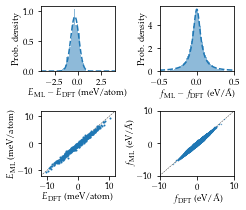

<Figure size 252x216 with 0 Axes>

In [82]:
plt.rcParams["figure.figsize"] = (3.5,3)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

f, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].set_xlabel(r"$E_\mathrm{ML}-E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[0,0].set_ylabel("Prob. density",labelpad=1.25)
ax[0,0].hist(1000*(energy_model_concat-energy_dft_concat),density=True, bins=50, range=(-4,4),alpha=0.5,color=colors[0])
hist, bin_edges = np.histogram(1000*(energy_model_concat-energy_dft_concat), bins=50, range=(-4,4),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-4,4,100)
ax[0,0].set_xlim([-4,4])
ax[0,0].plot(x,func(x,*popt),'--',color=colors[0])
print("Energy fit parameters: ", popt,np.sqrt(np.diag(pcov)))

ax[0,1].set_xlabel(r"$f_\mathrm{ML}-f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[0,1].set_ylabel("Prob. density",labelpad=1.25)
ax[0,1].hist(force_model_concat-force_dft_concat,density=True, bins=100, range=(-0.500,0.500),alpha=0.5,color=colors[0])
hist, bin_edges = np.histogram(force_model_concat-force_dft_concat, bins=100, range=(-0.400,0.400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
ax[0,1].set_xlim([-0.5,0.5])
x=np.linspace(-0.500,0.500,100)
ax[0,1].plot(x,func2(x,*popt),'--',color=colors[0])
print("Forces fit parameters: ", popt,np.sqrt(np.diag(pcov)))

mean=((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat))
#print(1000*np.mean(energy_dft_concat))
#print(1000*((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat)))
ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (meV/atom)",labelpad=1.25)
ax[1,0].scatter(1000*(energy_dft_concat-mean),1000*(energy_model_concat-mean),s=1,color=colors[0])
limsup=12
liminf=-12
ax[1,0].set_xlim([liminf,limsup])
ax[1,0].set_ylim([liminf,limsup])
ax[1,0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1,1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1,1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1,1].scatter(force_dft_concat,force_model_concat,s=0.1,color=colors[0])
limsup=10
liminf=-10
ax[1,1].set_xlim([liminf,limsup])
ax[1,1].set_ylim([liminf,limsup])
ax[1,1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

f.savefig("plot_test_felds_bulk.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()

In [79]:
path="/scratch/gpfs/ppiaggi/Simulations/HeterogeneousNucleation/TrainModel/Feldspar/iteration-27/"

folders=np.array(["run-simulations/test-for-reviewer/one-water-layer/extracted-confs"])

initialized=False

for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    shift=np.mean(energy_model)
    energy_model -= shift
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    energy_dft -= shift
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    if initialized:
        energy_model_concat = np.concatenate((energy_model_concat,energy_model/number_of_molecules),axis=0)
        energy_dft_concat = np.concatenate((energy_dft_concat,energy_dft/number_of_molecules),axis=0)
        force_model_concat = np.concatenate((force_model_concat,force_model),axis=0)
        force_dft_concat = np.concatenate((force_dft_concat,force_dft),axis=0)
    else:
        energy_model_concat = energy_model/number_of_molecules
        energy_dft_concat = energy_dft/number_of_molecules
        force_model_concat = np.copy(force_model)
        force_dft_concat = np.copy(force_dft)
        initialized=True
    filename = "energy-" + folder.replace("/","-") + ".png"
    #plt.close()
    rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model-energy_dft)/number_of_molecules,2)))
    rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model-force_dft),2)))
    print("system:",folder,"N frames:",frames,"N atoms:",number_of_molecules,"RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model_concat-energy_dft_concat),2)))
rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model_concat-force_dft_concat),2)))
print("All: RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)


system: run-simulations/test-for-reviewer/one-water-layer/extracted-confs N frames: 101 N atoms: 301 RMSE energy: 1.9166950300594066 RMSE forces: 125.64798566149459
All: RMSE energy: 1.9166950300594063 RMSE forces: 125.64798566149459


Energy fit parameters:  [1.81906698 0.62461365] [0.0469996  0.03837621]
Forces fit parameters:  [-0.00073904  0.0768168 ] [0.00164053 0.00164448]


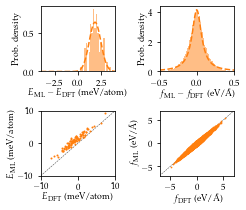

<Figure size 252x216 with 0 Axes>

In [80]:
plt.rcParams["figure.figsize"] = (3.5,3)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

f, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].set_xlabel(r"$E_\mathrm{ML}-E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[0,0].set_ylabel("Prob. density",labelpad=1.25)
ax[0,0].hist(1000*(energy_model_concat-energy_dft_concat),density=True, bins=50, range=(-4,4),alpha=0.5,color=colors[1])
hist, bin_edges = np.histogram(1000*(energy_model_concat-energy_dft_concat), bins=50, range=(-4,4),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-4,4,100)
ax[0,0].set_xlim([-4,4])
ax[0,0].plot(x,func(x,*popt),'--',color=colors[1])
print("Energy fit parameters: ", popt,np.sqrt(np.diag(pcov)))

ax[0,1].set_xlabel(r"$f_\mathrm{ML}-f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[0,1].set_ylabel("Prob. density",labelpad=1.25)
ax[0,1].hist(force_model_concat-force_dft_concat,density=True, bins=100, range=(-0.500,0.500),alpha=0.5,color=colors[1])
hist, bin_edges = np.histogram(force_model_concat-force_dft_concat, bins=100, range=(-0.400,0.400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
ax[0,1].set_xlim([-0.5,0.5])
x=np.linspace(-0.500,0.500,100)
ax[0,1].plot(x,func2(x,*popt),'--',color=colors[1])
print("Forces fit parameters: ", popt,np.sqrt(np.diag(pcov)))

mean=((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat))
#print(1000*np.mean(energy_dft_concat))
#print(1000*((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat)))
ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (meV/atom)",labelpad=1.25)
ax[1,0].scatter(1000*(energy_dft_concat-mean),1000*(energy_model_concat-mean),s=1,color=colors[1])
limsup=10
liminf=-10
ax[1,0].set_xlim([liminf,limsup])
ax[1,0].set_ylim([liminf,limsup])
ax[1,0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1,1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1,1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1,1].scatter(force_dft_concat,force_model_concat,s=0.5,color=colors[1])
limsup=7
liminf=-7
ax[1,1].set_xlim([liminf,limsup])
ax[1,1].set_ylim([liminf,limsup])
ax[1,1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

f.savefig("plot_test_felds_layer.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()

In [76]:
path="/scratch/gpfs/ppiaggi/Simulations/HeterogeneousNucleation/TrainModel/Feldspar/iteration-27/"

folders=np.array(["run-simulations/test-for-reviewer/one-water-molecule/extracted-confs"])

initialized=False

for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    shift=np.mean(energy_model)
    energy_model -= shift
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    energy_dft -= shift
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    if initialized:
        energy_model_concat = np.concatenate((energy_model_concat,energy_model/number_of_molecules),axis=0)
        energy_dft_concat = np.concatenate((energy_dft_concat,energy_dft/number_of_molecules),axis=0)
        force_model_concat = np.concatenate((force_model_concat,force_model),axis=0)
        force_dft_concat = np.concatenate((force_dft_concat,force_dft),axis=0)
    else:
        energy_model_concat = energy_model/number_of_molecules
        energy_dft_concat = energy_dft/number_of_molecules
        force_model_concat = np.copy(force_model)
        force_dft_concat = np.copy(force_dft)
        initialized=True
    filename = "energy-" + folder.replace("/","-") + ".png"
    #plt.close()
    rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model-energy_dft)/number_of_molecules,2)))
    rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model-force_dft),2)))
    print("system:",folder,"N frames:",frames,"N atoms:",number_of_molecules,"RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model_concat-energy_dft_concat),2)))
rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model_concat-force_dft_concat),2)))
print("All: RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)


system: run-simulations/test-for-reviewer/one-water-molecule/extracted-confs N frames: 101 N atoms: 259 RMSE energy: 1.5221752149815955 RMSE forces: 123.37607000733027
All: RMSE energy: 1.5221752149815955 RMSE forces: 123.37607000733027


Energy fit parameters:  [1.47066286 0.48409294] [0.0276715  0.02259369]
Forces fit parameters:  [0.0011383  0.07418565] [0.00148701 0.00149028]


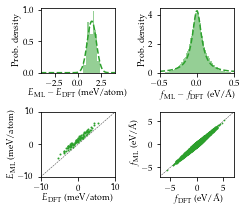

<Figure size 252x216 with 0 Axes>

In [78]:
plt.rcParams["figure.figsize"] = (3.5,3)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

f, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].set_xlabel(r"$E_\mathrm{ML}-E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[0,0].set_ylabel("Prob. density",labelpad=1.25)
ax[0,0].hist(1000*(energy_model_concat-energy_dft_concat),density=True, bins=50, range=(-4,4),alpha=0.5,color=colors[2])
hist, bin_edges = np.histogram(1000*(energy_model_concat-energy_dft_concat), bins=50, range=(-4,4),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-4,4,100)
ax[0,0].set_xlim([-4,4])
ax[0,0].plot(x,func(x,*popt),'--',color=colors[2])
print("Energy fit parameters: ", popt,np.sqrt(np.diag(pcov)))

ax[0,1].set_xlabel(r"$f_\mathrm{ML}-f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[0,1].set_ylabel("Prob. density",labelpad=1.25)
ax[0,1].hist(force_model_concat-force_dft_concat,density=True, bins=100, range=(-0.500,0.500),alpha=0.5,color=colors[2])
hist, bin_edges = np.histogram(force_model_concat-force_dft_concat, bins=100, range=(-0.400,0.400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
ax[0,1].set_xlim([-0.5,0.5])
x=np.linspace(-0.500,0.500,100)
ax[0,1].plot(x,func2(x,*popt),'--',color=colors[2])
print("Forces fit parameters: ", popt,np.sqrt(np.diag(pcov)))

mean=((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat))
#print(1000*np.mean(energy_dft_concat))
#print(1000*((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat)))
ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (meV/atom)",labelpad=1.25)
ax[1,0].scatter(1000*(energy_dft_concat-mean),1000*(energy_model_concat-mean),s=1,color=colors[2])
limsup=10
liminf=-10
ax[1,0].set_xlim([liminf,limsup])
ax[1,0].set_ylim([liminf,limsup])
ax[1,0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1,1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1,1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1,1].scatter(force_dft_concat,force_model_concat,s=0.5,color=colors[2])
limsup=7
liminf=-7
ax[1,1].set_xlim([liminf,limsup])
ax[1,1].set_ylim([liminf,limsup])
ax[1,1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

f.savefig("plot_test_felds_molecule.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()

In [14]:
path="/scratch/gpfs/ppiaggi/Simulations/HeterogeneousNucleation/TrainModel/Feldspar/iteration-28/"

folders=np.array(["data-iteration-26/feldspar/crystallization/001",
                "data-iteration-26/feldspar/crystallization/010",
                "data-iteration-26/feldspar/crystallization/100"])

initialized=False

for folder in folders:
    system = dpdata.LabeledSystem(path + folder, fmt = 'deepmd/raw')
    e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
    energy_model = e.reshape([-1])
    force_model = f.reshape([-1])
    energy_dft=np.genfromtxt(path + folder + "/energy.raw")
    force_dft=np.genfromtxt(path + folder + "/force.raw").reshape([-1])
    frames=system['coords'].shape[0]
    number_of_molecules=system['atom_types'].shape[0]
    if initialized:
        energy_model_concat = np.concatenate((energy_model_concat,energy_model/number_of_molecules),axis=0)
        energy_dft_concat = np.concatenate((energy_dft_concat,energy_dft/number_of_molecules),axis=0)
        force_model_concat = np.concatenate((force_model_concat,force_model),axis=0)
        force_dft_concat = np.concatenate((force_dft_concat,force_dft),axis=0)
    else:
        energy_model_concat = energy_model/number_of_molecules
        energy_dft_concat = energy_dft/number_of_molecules
        force_model_concat = np.copy(force_model)
        force_dft_concat = np.copy(force_dft)
        initialized=True
    filename = "energy-" + folder.replace("/","-") + ".png"
    #plt.close()
    rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model-energy_dft)/number_of_molecules,2)))
    rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model-force_dft),2)))
    print("system:",folder,"N frames:",frames,"N atoms:",number_of_molecules,"RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)

rmserror_e=np.sqrt(np.mean(np.power(1000*(energy_model_concat-energy_dft_concat),2)))
rmserror_f=np.sqrt(np.mean(np.power(1000*(force_model_concat-force_dft_concat),2)))
print("All: RMSE energy:",rmserror_e,"RMSE forces:",rmserror_f)


system: data-iteration-26/feldspar/crystallization/001 N frames: 55 N atoms: 664 RMSE energy: 0.5623230615612269 RMSE forces: 113.45119842800175
system: data-iteration-26/feldspar/crystallization/010 N frames: 142 N atoms: 900 RMSE energy: 0.40263663141591743 RMSE forces: 107.07801083609652
system: data-iteration-26/feldspar/crystallization/100 N frames: 157 N atoms: 544 RMSE energy: 0.8365838575733983 RMSE forces: 106.4713636590511
All: RMSE energy: 0.6515776082350071 RMSE forces: 107.82823999221431


Energy fit parameters:  [0.12271763 0.52262152] [0.0143357  0.01170505]
Forces fit parameters:  [-0.00170679  0.06065768] [0.00111721 0.00111865]


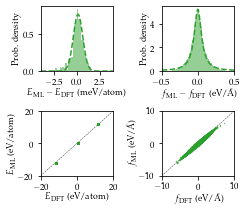

<Figure size 252x216 with 0 Axes>

In [15]:
plt.rcParams["figure.figsize"] = (3.5,3)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 9}
plt.rc('font', **font)

f, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].set_xlabel(r"$E_\mathrm{ML}-E_\mathrm{DFT}$ (meV/atom)",labelpad=1.25)
ax[0,0].set_ylabel("Prob. density",labelpad=1.25)
ax[0,0].hist(1000*(energy_model_concat-energy_dft_concat),density=True, bins=50, range=(-4,4),alpha=0.5,color=colors[2])
hist, bin_edges = np.histogram(1000*(energy_model_concat-energy_dft_concat), bins=50, range=(-4,4),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func, halfbin, hist, p0=(0,100))
x=np.linspace(-4,4,100)
ax[0,0].set_xlim([-4,4])
ax[0,0].plot(x,func(x,*popt),'--',color=colors[2])
print("Energy fit parameters: ", popt,np.sqrt(np.diag(pcov)))

ax[0,1].set_xlabel(r"$f_\mathrm{ML}-f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[0,1].set_ylabel("Prob. density",labelpad=1.25)
ax[0,1].hist(force_model_concat-force_dft_concat,density=True, bins=100, range=(-0.500,0.500),alpha=0.5,color=colors[2])
hist, bin_edges = np.histogram(force_model_concat-force_dft_concat, bins=100, range=(-0.400,0.400),density=True)
halfbin = (bin_edges[1:]+bin_edges[:-1])/2.0
popt, pcov = curve_fit(func2, halfbin, hist, p0=(0,100))
ax[0,1].set_xlim([-0.5,0.5])
x=np.linspace(-0.500,0.500,100)
ax[0,1].plot(x,func2(x,*popt),'--',color=colors[2])
print("Forces fit parameters: ", popt,np.sqrt(np.diag(pcov)))

mean=((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat))
#print(1000*np.mean(energy_dft_concat))
#print(1000*((np.amax(energy_dft_concat)-np.amin(energy_dft_concat))/2 + np.amin(energy_dft_concat)))
ax[1,0].set_xlabel(r"$E_\mathrm{DFT}$ (eV/atom)",labelpad=1.25)
ax[1,0].set_ylabel(r"$E_\mathrm{ML}$ (eV/atom)",labelpad=1.25)
ax[1,0].scatter(energy_dft_concat-mean,energy_model_concat-mean,s=1,color=colors[2])
limsup=20
liminf=-20
ax[1,0].set_xlim([liminf,limsup])
ax[1,0].set_ylim([liminf,limsup])
ax[1,0].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)

fig = plt.figure()
ax[1,1].set_xlabel(r"$f_\mathrm{DFT}$ (eV/\AA)",labelpad=1.25)
ax[1,1].set_ylabel(r"$f_\mathrm{ML}$ (eV/\AA)",labelpad=1.25)
ax[1,1].scatter(force_dft_concat,force_model_concat,s=0.1,color=colors[2])
limsup=10
liminf=-10
ax[1,1].set_xlim([liminf,limsup])
ax[1,1].set_ylim([liminf,limsup])
ax[1,1].plot([liminf,limsup],[liminf,limsup],'--',linewidth=0.5,color='black',zorder=0,alpha=0.75)


f.tight_layout()

#f.savefig("plot_all.png",dpi=300,bbox_inches='tight')
#f.savefig("plot_water.pdf",bbox_inches='tight')

plt.show()